In [59]:
import pvlib
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Definir a localização (latitude, longitude, fuso horário)

In [2]:
location = pvlib.location.Location(latitude=40.0, longitude=-105.0, tz='Etc/GMT+7')

# Definir intervalo de tempo

In [3]:
times = pd.date_range(start='2024-01-01', end='2024-01-02', freq='1H', tz=location.tz)

In [4]:
solar_position = location.get_solarposition(times)
print(solar_position)

                           apparent_zenith      zenith  apparent_elevation  \
2024-01-01 00:00:00-07:00       163.022877  163.022877          -73.022877   
2024-01-01 01:00:00-07:00       159.222187  159.222187          -69.222187   
2024-01-01 02:00:00-07:00       150.107214  150.107214          -60.107214   
2024-01-01 03:00:00-07:00       139.203643  139.203643          -49.203643   
2024-01-01 04:00:00-07:00       127.783191  127.783191          -37.783191   
2024-01-01 05:00:00-07:00       116.340324  116.340324          -26.340324   
2024-01-01 06:00:00-07:00       105.166240  105.166240          -15.166240   
2024-01-01 07:00:00-07:00        94.521211   94.521211           -4.521211   
2024-01-01 08:00:00-07:00        84.581730   84.708198            5.418270   
2024-01-01 09:00:00-07:00        76.065261   76.119394           13.934739   
2024-01-01 10:00:00-07:00        69.223934   69.259941           20.776066   
2024-01-01 11:00:00-07:00        64.685031   64.714056          

In [48]:
latitude, longitude, timezone = -23.55, -46.63, 'America/Sao_Paulo'
location = pvlib.location.Location(latitude, longitude, timezone)

In [49]:
times = pd.date_range(start="2025-01-04", end="2025-01-04 23:59", freq="1H", tz=timezone)

In [50]:
solar_position = location.get_solarposition(times)

In [51]:
clearsky = location.get_clearsky(times)  # Modelo de céu limpo

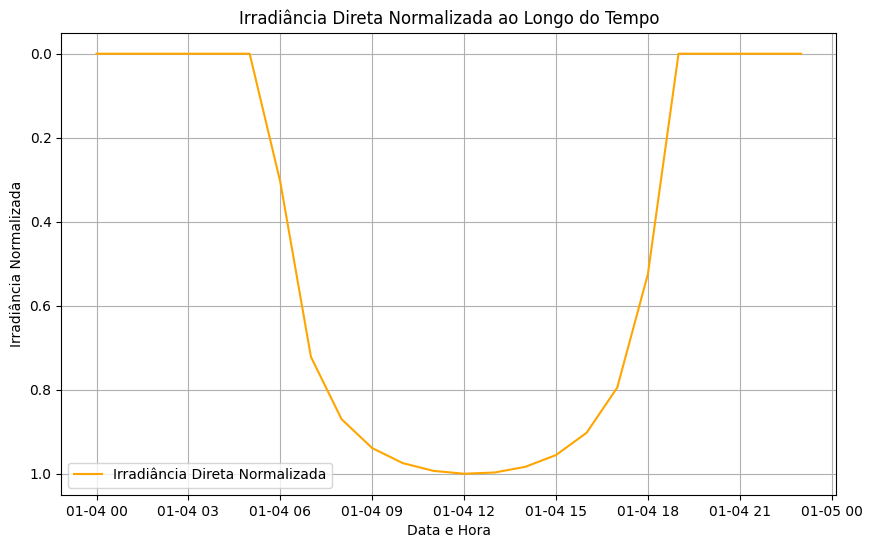

In [52]:
# Armazenar a irradiância direta
direct_irradiance = clearsky['dni']

# Normalizar os dados
normalized_irradiance = (direct_irradiance - direct_irradiance.min()) / (direct_irradiance.max() - direct_irradiance.min())

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(times, normalized_irradiance, label='Irradiância Direta Normalizada', color='orange')
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância Normalizada')
plt.title('Irradiância Direta Normalizada ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

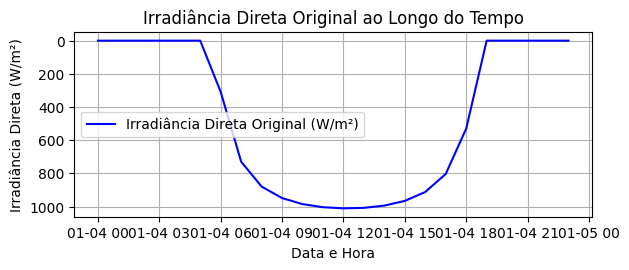

In [53]:
# Gráfico 2: Irradiância original
plt.subplot(2, 1, 2)
plt.plot(times, direct_irradiance, label='Irradiância Direta Original (W/m²)', color='blue')
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância Direta (W/m²)')
plt.title('Irradiância Direta Original ao Longo do Tempo')
plt.legend()
plt.grid(True)

# Exibir os gráficos
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

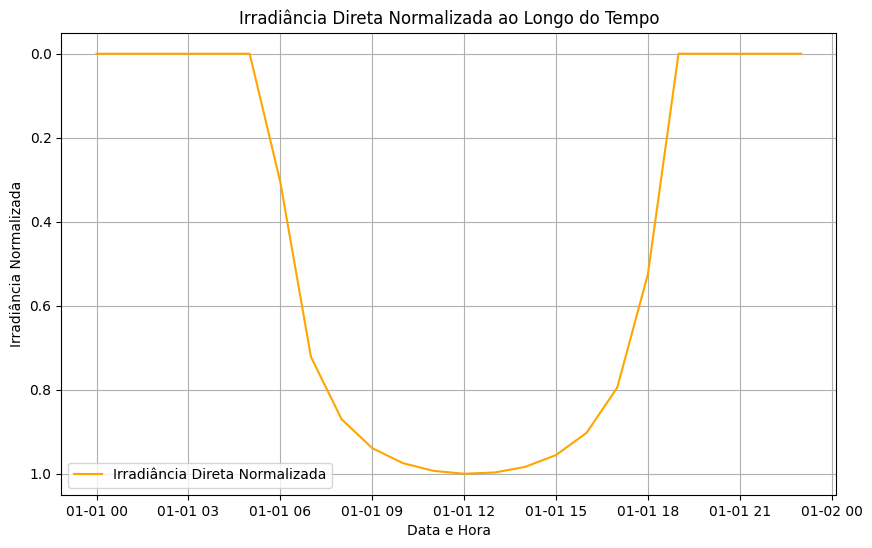

In [46]:
times2 = pd.date_range(start="2020-01-01", end="2020-01-01 23:59", freq="1H", tz=timezone)
solar_position = location.get_solarposition(times2)
clearsky2 = location.get_clearsky(times2)  # Modelo de céu limpo


# Armazenar a irradiância direta
direct_irradiance2 = clearsky['dni']

# Normalizar os dados
normalized_irradiance2 = (direct_irradiance2 - direct_irradiance2.min()) / (direct_irradiance2.max() - direct_irradiance2.min())

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(times2, normalized_irradiance2, label='Irradiância Direta Normalizada', color='orange')
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância Normalizada')
plt.title('Irradiância Direta Normalizada ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


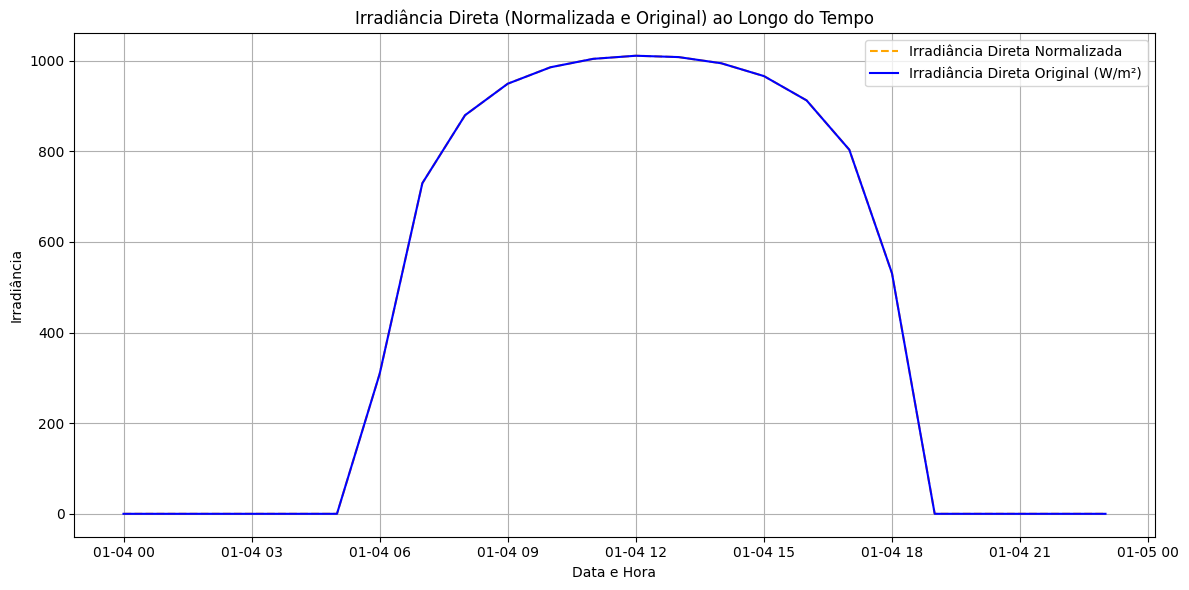

In [55]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Linha 1: Irradiância normalizada
plt.plot(times, direct_irradiance, label='Irradiância Direta Normalizada', color='orange', linestyle='--')

# Linha 2: Irradiância original
plt.plot(times, direct_irradiance2, label='Irradiância Direta Original (W/m²)', color='blue')

# Configurações do gráfico
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância')
plt.title('Irradiância Direta (Normalizada e Original) ao Longo do Tempo')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Em 4 de janeiro de 2025, o Sol emitiu uma erupção solar de classe X1.8, uma das mais intensas, com pico às 7h48 ET (10h48 GMT). 
BLOG DA NASA

As erupções solares de classe X podem liberar aproximadamente 10^26 a 10^27 joules de energia. No entanto, a maior parte dessa energia é dispersa no espaço, com apenas uma pequena fração atingindo a Terra. A intensidade e os efeitos dessa energia dependem de fatores como a direção da ejeção e a interação com o campo magnético terrestre.

Para informações mais detalhadas sobre a energia específica dessa erupção e seus impactos, é recomendável consultar fontes especializadas, como o Centro de Previsão do Clima Espacial da NOAA ou o Instituto Nacional de Pesquisas Espaciais (INPE).

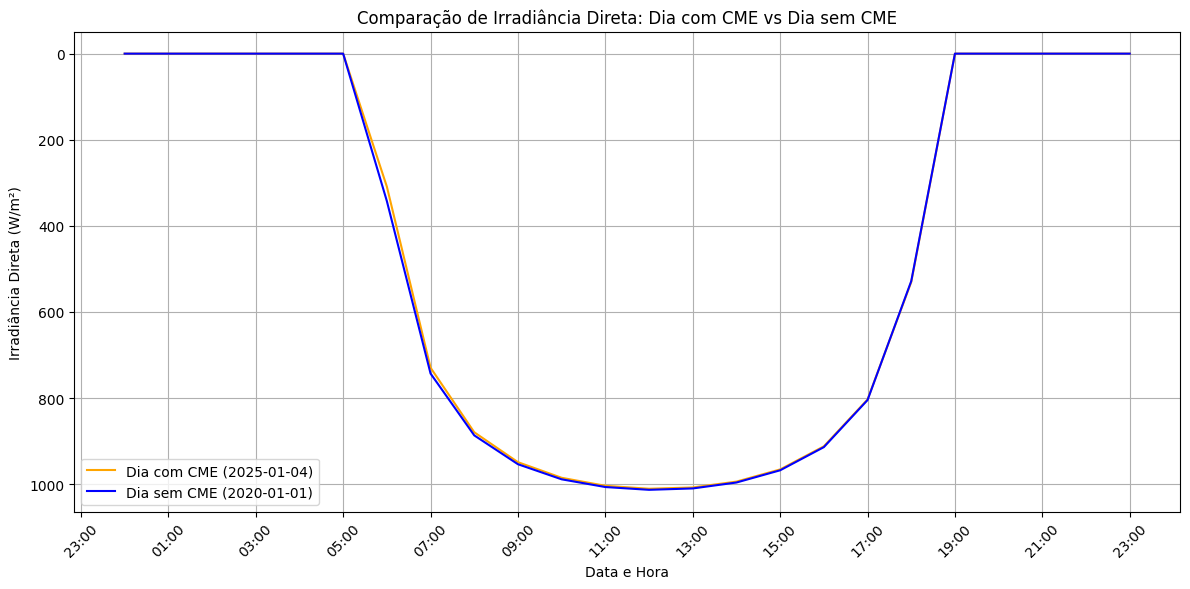

In [60]:
import pandas as pd
import pvlib
import matplotlib.pyplot as plt

# Localização e dados meteorológicos
latitude, longitude, timezone = -23.55, -46.63, 'America/Sao_Paulo'
location = pvlib.location.Location(latitude, longitude, timezone)

# Datas e horários para os dois dias
times_cme = pd.date_range(start="2025-01-04", end="2025-01-04 23:59", freq="1H", tz=timezone)  # Dia com CME
times_no_cme = pd.date_range(start="2020-01-01", end="2020-01-01 23:59", freq="1H", tz=timezone)  # Dia sem CME

# Dados de irradiância para o dia com CME
clearsky_cme = location.get_clearsky(times_cme)  # Modelo de céu limpo
direct_irradiance_cme = clearsky_cme['dni']

# Dados de irradiância para o dia sem CME
clearsky_no_cme = location.get_clearsky(times_no_cme)  # Modelo de céu limpo
direct_irradiance_no_cme = clearsky_no_cme['dni']

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Linha 1: Dia com CME
plt.plot(times_cme, direct_irradiance_cme, label='Dia com CME (2025-01-04)', color='orange')

# Linha 2: Dia sem CME
plt.plot(times_cme, direct_irradiance_no_cme, label='Dia sem CME (2020-01-01)', color='blue')

# Configurações do gráfico
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância Direta (W/m²)')
plt.title('Comparação de Irradiância Direta: Dia com CME vs Dia sem CME')
plt.legend()
plt.grid(True)

# Formatar o eixo x com horas no horário de Brasília
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=timezone))  # Formato de hora:minuto
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Marcações a cada 2 horas

# Rotacionar as labels do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


A erupção solar de 12 de junho de 2021 foi uma erupção classe M, o que indica uma explosão solar de média intensidade. Para eventos dessa classe, a energia liberada é tipicamente enorme, mas não chega a ser tão intensa quanto as erupções classe X.

Embora a energia exata da erupção de 12 de junho de 2021 não seja facilmente encontrada em fontes de acesso público, podemos estimar com base em dados típicos de erupções solares.

Estimativas de Energia para Erupções de Classe M:
As erupções solares classe M podem liberar uma energia equivalente a 10^25 joules ou até mais

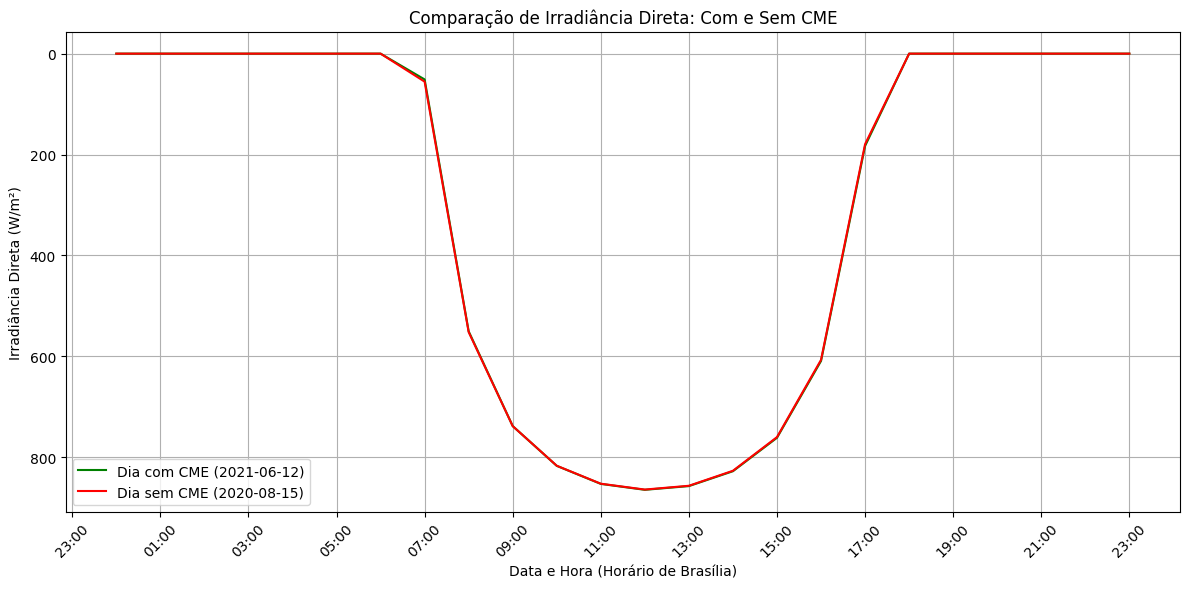

In [69]:
# Novas datas para comparação
times_cme_2 = pd.date_range(start="2021-06-13", end="2021-06-13 23:59", freq="1H", tz=timezone)  # Outro dia com CME
times_no_cme_2 = pd.date_range(start="2021-06-11", end="2021-06-11 23:59", freq="1H", tz=timezone)  # Outro dia sem CME

# Dados de irradiância para o novo dia com CME
clearsky_cme_2 = location.get_clearsky(times_cme_2)
direct_irradiance_cme_2 = clearsky_cme_2['dni']

# Dados de irradiância para o novo dia sem CME
clearsky_no_cme_2 = location.get_clearsky(times_no_cme_2)
direct_irradiance_no_cme_2 = clearsky_no_cme_2['dni']

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Linha 3: Outro dia com CME (12 de junho de 2021)
plt.plot(times_cme_2, direct_irradiance_cme_2, label='Dia com CME (2021-06-12)', color='green')

# Linha 4: Outro dia sem CME (15 de agosto de 2020)
plt.plot(times_cme_2, direct_irradiance_no_cme_2, label='Dia sem CME (2020-08-15)', color='red')

# Configurações do gráfico
plt.xlabel('Data e Hora (Horário de Brasília)')
plt.ylabel('Irradiância Direta (W/m²)')
plt.title('Comparação de Irradiância Direta: Com e Sem CME')
plt.legend()
plt.grid(True)

# Formatar o eixo x com horas no horário de Brasília
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=timezone))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Marcações a cada 2 horas

# Rotacionar as labels do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()
